In [1]:
import numpy as np

## Задача 1
Даны значения зарплат из выборки выпускников: 

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.


In [2]:
salaries = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [3]:
mean = salaries.sum() / len(salaries) # среднее арифметическое
mean

65.3

In [4]:
std = np.sqrt(((salaries - mean) ** 2).sum() / len(salaries)) # среднеквадратическое отклонение
std

30.823854398825596

In [5]:
var = ((salaries - mean) ** 2).sum() / len(salaries) # Смещенная оценка дисперсии
var

950.11

In [6]:
var_2 = ((salaries - mean) ** 2).sum() / (len(salaries) - 1) # Несмещенная оценка дисперсии
var_2

1000.1157894736842

## Задача 2
Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [7]:
import seaborn as sns

In [8]:
q_25 = np.percentile(salaries, 25) # 1-ый квартиль
q_75 = np.percentile(salaries, 75) # 3-ий квартиль
q_range = q_75 - q_25
print(f'первый квартиль - {q_25}\nТретий квартиль - {q_75}\nИнтерквартильный размах - {q_range}')

первый квартиль - 42.0
Третий квартиль - 81.0
Интерквартильный размах - 39.0


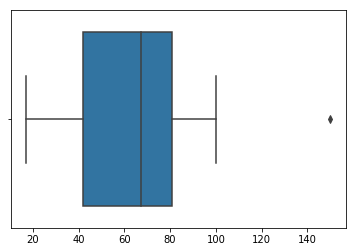

In [9]:
sns.boxplot(salaries);

In [10]:
upper_limit = q_75 + 1.5 * q_range
lower_limit = q_25 - 1.5 * q_range
print(f'Массив выбросов: {salaries[np.where((salaries > upper_limit) | (salaries < lower_limit))]}')

Массив выбросов: [150]


## Задача 3
В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

In [11]:
A = 0.8 # вероятность сдать сессию на факультете А
B = 0.7 # вероятность сдать сессию на факультете B
C = 0.9 # вероятность сдать сессию на факультете C

Примем, что 100% - всего студентов, которые учатся на всех факультетах. Пусть x - количество студентов на факультете A и B, тогда получаем уравнение x + x + 2 * x = 100. отсюда 4x = 100, x = 25. Таким образом вероятность того, что случайный студент учиться на факультете A или B равна 25 / 100 = 0.25. Вероятность, что случайный студент учится на факультете C = 0.5. Запишем вероятности

In [12]:
p_A = 0.25
p_B = 0.25
p_C = 0.5

Для решения задачи понадобится формула Байеса

In [13]:
def Bayes(p, condition_p, full_p):
    return p * condition_p / full_p

Полная вероятность сдать первую сессию

In [14]:
full_proba = p_A * A + p_B * B + p_C * C 
full_proba

0.825

По формуле Байеса находим вероятности, что студент сдав сессию учится на факультете А,B или C соответственно

In [15]:
result_A = Bayes(p_A, A, full_proba)
print(f'Вероятность, что студент, сдав сессию, учится на факультете A = {result_A}')

Вероятность, что студент, сдав сессию, учится на факультете A = 0.24242424242424246


In [16]:
result_B = Bayes(p_B, B, full_proba)
print(f'Вероятность, что студент, сдав сессию, учится на факультете B = {result_B}')

Вероятность, что студент, сдав сессию, учится на факультете B = 0.21212121212121213


In [17]:
result_C = Bayes(p_C, C, full_proba)
print(f'Вероятность, что студент, сдав сессию, учится на факультете C = {result_C}')

Вероятность, что студент, сдав сессию, учится на факультете C = 0.5454545454545455
